## **DS-GA 1007 $\:$ | $\,$ Lecture 6**

## **Programming for Data Science**

<br>

---

#### Jeremy Curuksu, PhD

#### NYU Center for Data Science

#### jeremy.cur@nyu.edu

#### October 23, 2023




## **Matplotlib: Graphical Visualization of Data** 

<br>


### **Last lecture**:

### ▶ Array Manipulation with NumPy

### ▶ Mathematical Operations with NumPy

<br>


### **Today**:

### ▶ Fastest approach to visualize data with Matplotlib

### ▶ Object-oriented approach to vizualize data with Matplotlib

### ▶ Advanced customization and specialized types of vizualization



# Introduction

http://matplotlib.org/

**Matplotlib is a Python library to vizualize data and create reproducible scientific figures ("plots"), programmatically**. It is often used to produce publication-quality figures because it gives the developer complete control over the appearance of their plots and can easily produce static or vector graphics files without the need for any GUIs.

The Matplotlib library contains support for 2D and 3D graphics objects (remember everything is an object in Python...) with methods to efficiently operate on them. In particular: 

- **Matplotlib contains built-in functions and object methods to control every element in a figure**, such as custom labels and texts

- **Matplotlib was designed to allow for interactive control of figures**. It can be used in two ways, we will see both: Using a purely functional approach which is sometimes easier and faster, and an object-oriented approach which starts by creating a figure object and then manipulate it through the object's methods. **The object-oriented approach provides the most flexibility and customization**

- Matplotlib can produce high-quality output in many formats

- Matplotlib was originally created with a goal to replicate Matlab's plotting capabilities in Python so if you are familiar with Matlab, Matplotlib will feel familiar already!


# Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](https://matplotlib.org/stable/gallery/index.html), [FAQs](http://matplotlib.org/stable/faq/index.html), [API documentation](http://matplotlib.org/stable/api/index.html), and, most importantly, the [gallery](https://matplotlib.org/stable/gallery/index.html). 

# Gallery
Many users of Matplotlib are often faced with the question, "I want to make a figure that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query! (full disclosure: I wrote that before ChatGPT was releasd...) This is why the [gallery](https://matplotlib.org/stable/gallery/index.html) is so useful, because it showcases the variety of ways one can make figures. Browse through the gallery, click on any figure that has pieces of what you want to see and the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

Matplotlib is an open-source Python library. If you have a new and interesting plot that demonstrates a feature of Matplotlib, you are invited to submit a concise, well-commented version of the code for inclusion in the gallery.

# Mailing Lists and StackOverflow
When you are stuck, and cannot figure out how to get something to work, or just need some hints on how to get started, you will find much of the community at the matplotlib-users [mailing list](https://mail.python.org/mailman/listinfo/matplotlib-users). This mailing list is an excellent resource of information with many friendly members who just love to help out newcomers. The number one rule to remember with this list is to be persistant. While many questions do get answered fairly quickly, some do fall through the cracks, or the one person who knows the answer isn't available. Therefore, try again with your questions rephrased, or with a plot showing your attempts so far. We love plots, so an image showing what is wrong often gets the quickest responses.

Another community resource is [StackOverflow](http://stackoverflow.com/questions/tagged/matplotlib), so if you need to build up karma points, submit your questions here, and help others out too! We are also on [Gitter](https://gitter.im/matplotlib/matplotlib).

# Github repository
[Matplotlib](https://github.com/matplotlib) is hosted by GitHub.

# Bug Reports and feature requests
So, you think you found a bug? Or maybe you think some feature is just too difficult to use? Or missing altogether? Submit your bug reports [here](https://github.com/matplotlib/matplotlib/issues) at Matplotlib's issue tracker. We also have a process for submitting and discussing Matplotlib Enhancement Proposals ([MEPs](http://matplotlib.org/devdocs/devel/MEP/index.html)).

# Importing Matplotlib as a library:
Matplotlib has multiple backends which allows it to be used on a variety of platforms with a variety of GUI toolkits, all of them written so that most of the time, you will not need to care which backend you are using. But **there are also different Matplotlib (sub-)packages for different  types and/or styles of plots**. The basic package is ```pyplot```. For the purpose of *introducing* data vizualization concepts, this is what we will use.


In [69]:
import matplotlib.pyplot as plt # Abbreviations "plt" is semi-standardized...


# Anatomy of a "Plot"

People use "plot" to mean many different things.  In this lecture we'll use a consistent terminology mirrored by the names of the underlying classes:

<img src="figure_axes_axis_labeled.png" width="400">

The ``figure`` is the top-level container in this hierarchy.  It is the overall *canvas* that everything is drawn on.  You can have multiple independent figures and ``figure`` can contain multiple ``axes``. 

Most plotting ocurs on an ``axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  

We often set up an ``axes`` with a call to ``subplot`` (which places ``axes`` objects on a regular grid), so ``axes`` and ``subplot`` are mostly synonymous.

In two dimensions, each ``axes`` has an ``Xaxis`` and a ``Yaxis``.  These contain the ticks, tick locations, labels, etc. 


# Create a Figure

In [70]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Awww, nothing happened! This is because we just created an empty figure object.

Also, by default Matplotlib does not show anything until told to do so. Depending on your Python and Jupyter Notebook setups, you may have to initiate your program with the command ```%matplotlib inline``` and regularly type ```plt.show()``` (or just ```;``` as shortcut) to show figures interactively. This does not affect figures saved to file which are controlled separately (see section 3).

**It is not needed to create a figure object everytime we want to produce a plot, in particular if we just need quick and dirty plots as we interactively explore some data: Pyplot automatically creates a figure object when we invoke the function ```plot```**

# 1) "*Fastest*" approach to create a plot

We will review key functionalities of the function `plot`, more details can be found at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

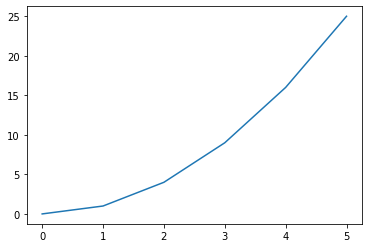

In [71]:
l = [0,1,4,9,16,25]

plt.plot(l); # The ";" is a shortcut to avoid typing "plt.show()"

▶ Pyplot supplies x-axis values if a single list is used


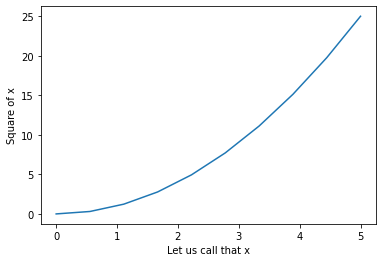

In [72]:
import numpy as np
x = np.linspace(0, 5, 10) # Vector of 10 values between 0 and 5
y = x ** 2

plt.plot(x, y)
plt.xlabel('Let us call that x')
plt.ylabel('Square of x'); 

▶ The ```plot``` command is stateful = it keeps track of the current figure and plotting area

▶ Each pyplot statement makes some change to the existing figure object

▶ Pyplot operates on NumPy arrays. Lists are converted to NumPy arrays internally

## Vizualizing multiple curves on a same plot

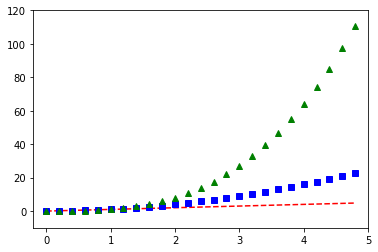

In [73]:
x = np.arange(0, 5, 0.2)
plt.plot(x, x, 'r--', x, x**2, 'bs', x, x**3, 'g^')
plt.axis([-0.2, 5, -10, 120]);  # The axis method specifies axis limits

▶ The ```plot``` command can take an arbitrary number of arguments

▶ In addition to x, y arguments, ```plot``` can takes other optional 'formating' arguments

▶ Line Properties: Letters and symbols of formating arguments are (almost) identical to Matlab! Color strings can be concatenated to line style strings. Additional arguments to format lines are available such as ```linewidth```, see example below


## Creating multiple sub-plots on a same canvas

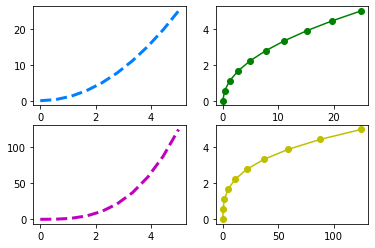

In [77]:
x = np.linspace(0, 5, 10)

plt.subplot(2,2,1) # plt.subplot(nrows, ncols, plot_number)
plt.plot(x, x**2, '--', color = [0,0.5,1], linewidth = 3) 
plt.subplot(2,2,2)
plt.plot(x**2, x, 'go-');
plt.subplot(2,2,3)
plt.plot(x, x**3, 'm--', linewidth = 3);
plt.subplot(2,2,4)
plt.plot(x**3, x, 'yo-'); 

# 2) Matplotlib Object Oriented approach
If we use the fast plotting approach shown above, we can only manipulate the "current" figure object, which PyPlot creates by default when calling the function ``plot``. In contrast, **with the object-oriented approach we can create, name and manipulate any number of figure objects anywhere in our programs**.

The Matplotlib's Object Oriented API is the most flexible and complete approach to create and manipulate figures with Matplotlib. First step is to instantiate a figure object. Then, we can call methods or attributes from that object.

Key attributes of figures are [`axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) which are the actual containers of plot (or subplot) contents. An `Axes` object is made up of [`axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An `Axes` object must belong to a `figure`. Most commands issued on `figure` objects will be with respect to their underlying `axes` object(s).

Typically, we set up a `figure`, then add one or several `axes` object(s) to it. 


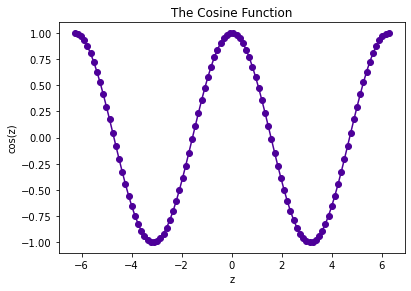

In [78]:
# Let's try that again 
f = plt.figure() # Create a figure (empty for now)

# Add set of axes to figure
axes = f.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range: 0 to 1)

# We will vizualize the cosine function for variable z in [-2pi, +2pi]
z = np.linspace(-2*np.pi, 2*np.pi, 100)
cosz = np.cos(z)
nyu = [0.3, 0, 0.6]

# Plot on that set of axes
axes.plot(z, cosz, 'o-', color = nyu)
axes.set_xlabel('z') # Notice "set_" is often the prefix of method names
axes.set_ylabel('cos(z)')
axes.set_title('The Cosine Function');


## Figure object with multiple axes
With a handle to each `axes` object, we now have full control on where the `axes` are placed on the figure, and can easily add more than one set of `axes` to the figure:

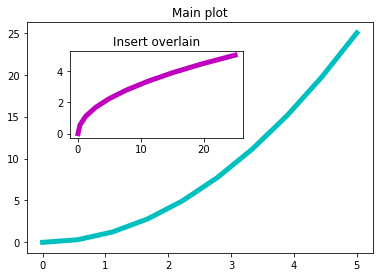

In [79]:
f = plt.figure()
axes1 = f.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = f.add_axes([0.2, 0.5, 0.4, 0.3]) # insert axes

# Main figure Axes 
axes1.plot(x, y, 'c', linewidth = 5)
axes1.set_title('Main plot')

# Insert figure Axes 
axes2.plot(y, x, 'm', linewidth = 5)
axes2.set_title('Insert overlain');

## Figure object with multiple subplots 

In data science, we often need to create multiple (related) subplots in a nicely formatted multi-plot figure. 

For this purpose, it is possible to use the figure's method ```add_subplot``` to add and manipulate each subplot individually. A subplot is an `axes` object positioned on a grid system of a `figure` object.


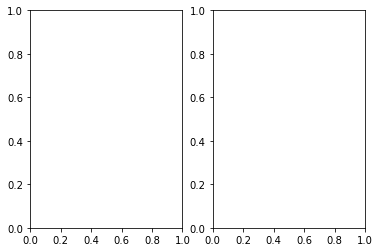

In [80]:
f = plt.figure()
ax1 = f.add_subplot(121) 
ax2 = f.add_subplot(122)


**Alternatively, the method ```plt.subplots()``` is often preferred because it is an automatic axis manager for multi-plot figures that can be used similarly to ```plt.figure()``` but, using tuple unpacking, it creates handles for both the figure and multiple axes simultaneously, in just one line of code.**

Whether to use ```plt.figure()``` followed by multiple individual ```add_subplot()``` calls, or a single ```plt.subplots()``` call with tuple unpacking that creates handles for the figure and multiple axes in one line of code, is mostly a question of personal preference. Since ```plt.subplots()``` can make the code more concise we will use this method.

Note that if called with no argument, either method creates a single plot and becomes equivalent to ```plt.plot()``` . 


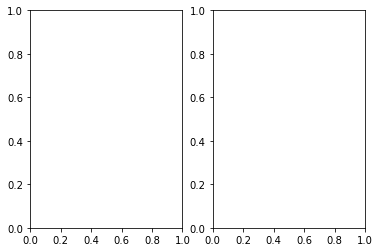

In [81]:
# Tuple unpacking: Create handles for one figure and several axes, in just one line of code
f, axes = plt.subplots(nrows = 1, ncols = 2) 


The `axes` object is a 2D NumPy array object. Each item in the array is one of the subplots.  They're laid out as you see them on the figure above.  

In [82]:
# Axes is an NumPy array of axes objects positioned on a grid system 
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

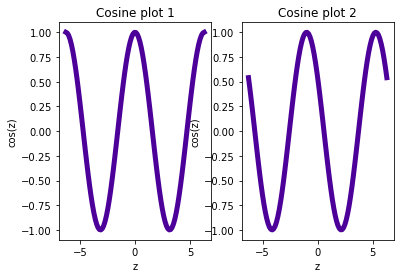

In [83]:
# We can iterate through this array:    
for i,ax in enumerate(axes): # `enumerate` associates an explicit counter to the 'for' loop
    ax.plot(z, np.cos(z + i), color = nyu, linewidth = 5) # Shift z by i and plot cosine
    ax.set_xlabel('z')
    ax.set_ylabel('cos(z)')
    ax.set_title('Cosine plot {}'.format(i+1))
f # Display the Figure object 


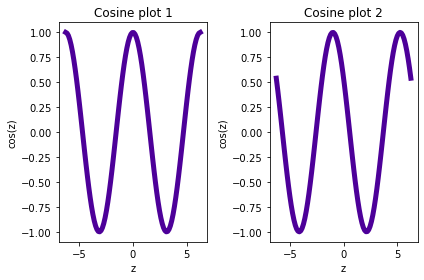

In [84]:
# Adjust positions of axes on canvas so there is no overlapping content:
f.tight_layout() 
f

Notice that Matplotlib's objects typically have lots of "explicit setters", that is functions that start with ``set_<something>`` and control a particular parameter. To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `axes` methods that start with `set`.

These many calls to ``set_<something>`` can quickly get laborious and repetitive. Instead, Matplotlib objects have a method ``set`` which can receive multiple arguments to be '*set*': it processes each argument by calling the corresponding "setter".  For example, `ax.set(xlabel='z')` calls `ax.set_xlabel('z')`. See example below.

Note individual functions such as `ax.set_xlabel('z', size=25)` can still be useful to set detailed options for a given parameter.


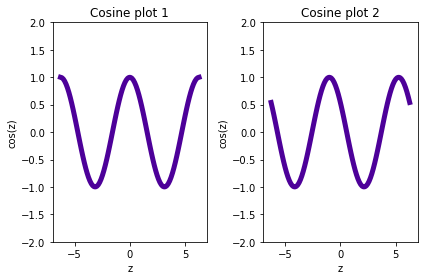

In [85]:
f, axes = plt.subplots(nrows = 1, ncols = 2)
for i,ax in enumerate(axes): 
    ax.plot(z, np.cos(z + i), color = nyu, linewidth = 5)
    ax.set(xlim = [-7,7], ylim = [-2,2], title = 'Cosine plot {}'.format(i+1), xlabel = 'z', ylabel = 'cos(z)')
f.tight_layout() 


It is possible to access and manipulate each subplot individually by indexing the `axes` array, and invoking methods on each element of this array separately:

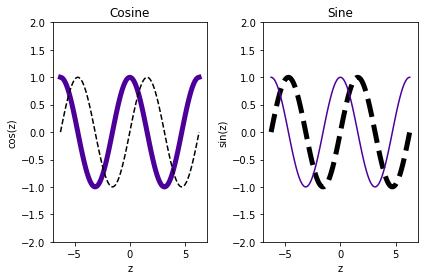

In [86]:
f, axes = plt.subplots(nrows = 1, ncols = 2)

axes[0].plot(z, cosz, color = nyu, linewidth = 5)
axes[0].plot(z, np.sin(z), 'k--')
axes[0].set(xlim = [-7,7], ylim = [-2,2], title = 'Cosine', xlabel = 'z', ylabel = 'cos(z)')

axes[1].plot(z, np.sin(z), 'k--', linewidth = 5)
axes[1].plot(z, cosz, color = nyu)
axes[1].set(xlim = [-7,7], ylim = [-2,2], title = 'Sine', xlabel = 'z', ylabel = 'sin(z)')

f.tight_layout()


# 3) Advanced customization and specialized types of vizualization

## Legends, labels, titles, and other properties 

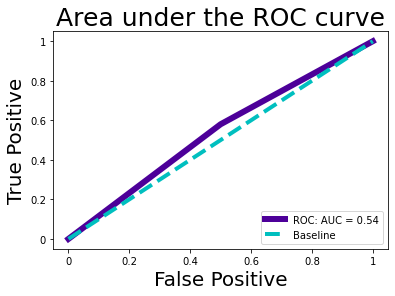

In [87]:
# Plot ROC AUC
from sklearn.metrics import roc_curve, auc
groundtruth = np.array([0,1]*50)         # Broadcasting is a thing in Python :) 
predictions = np.random.randint(0,2,100) # Let's flip a coin!
fp, tp, d = roc_curve(groundtruth, predictions)  
result = auc(fp, tp)  # Computed because we will print the AUC result on the plot

# Create a figure
f_roc, ax = plt.subplots()

# Create one plot with two curves on it. Each curve is given a separate label 
ax.plot(fp, tp, color = nyu, lw = 6, label = 'ROC: AUC = {:.2f}'.format(result)) # Notice the lw shortcut
ax.plot([0, 1], [0, 1], 'c--', lw = 4, label = "Baseline") # Last one plotted appears on top
ax.set_title('Area under the ROC curve', fontsize = 25)
ax.set_xlabel('False Positive', fontsize = 20)
ax.set_ylabel('True Positive', fontsize = 20)
ax.set_xticks(np.arange(0,1.2,0.2))
ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1']) # Instead of 0.0, 0.2, ..., 1.0
ax.set_yticks(np.arange(0,1.2,0.2))
ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'])

# The legend method must be invoked for the legend to appear on the figure: (loc argument is optional)
ax.legend() 
ax.legend(loc=0)  # Let Matplotlib decide the optimal location
ax.legend(loc=1)  # Upper right corner, can also use ax.legend(loc="upper right")
ax.legend(loc=2)  # Upper left corner,  can also use ax.legend(loc="upper left")
ax.legend(loc=3)  # Lower left corner,  can also use ax.legend(loc="lower left")
ax.legend(loc=4); # Lower right corner, can also use ax.legend(loc="lower right")


Check out other legend options at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

## Figure resolution and size

Matplotlib allows DPI (pixel a.k.a. *dot*, per inch) resolution and figure size/aspect ratio to be specified when the `figure` object is created:

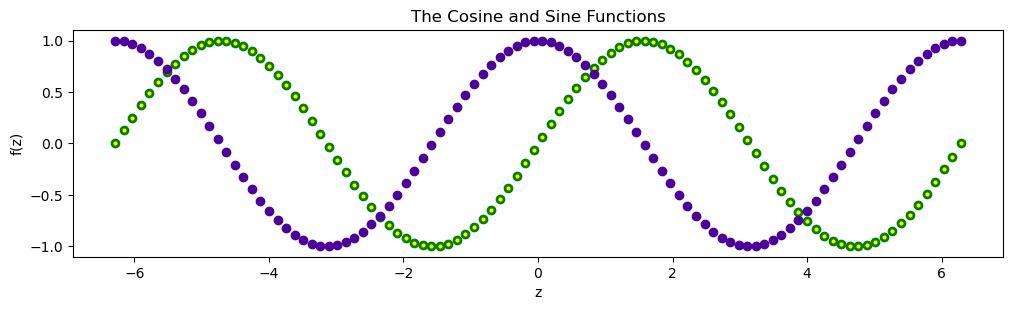

In [88]:
f_trigo, ax = plt.subplots(figsize = (12,3), dpi = 100) # figsize is a tuple (width, height) in inches

ax.plot(z, np.sin(z), 'yo', markersize = 5, markerfacecolor = 'yellow', markeredgewidth = 2, 
        markeredgecolor = 'green')
ax.plot(z, cosz, 'o', color = nyu)
ax.set_xlabel('z') 
ax.set_ylabel('f(z)')
ax.set_title('The Cosine and Sine Functions');


## Saving figures
To save figures on file, you can use the `savefig` method of `figure` objects. 

Matplotlib can save high-quality output in many formats, including PNG, JPG, EPS, SVG and PDF. The format is automatically recognized from the extension given to the name of the file. Optional parameters such as the resolution can be invoked.

In [ ]:
#f_roc.patch.set_facecolor('xkcd:white')
# f_trigo.patch.set_facecolor('xkcd:white')
f_trigo.savefig("trigo.png")
f_roc.savefig("roc.png", dpi = 200) # Parameters such as resolution are optional


Many other options are available to produce high-quality nice-looking custom figures with your data...

## Special types of plots (just a glimpse)
#### Source: https://matplotlib.org/stable/gallery

### Scatter Plots, Bar Plots and Histograms

1) Scatter plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
<br> 2) Bar plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

*Let's compare a line plot vs. scatter plot vs. bar plot*: 

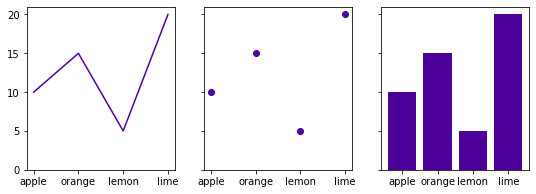

In [89]:
# Create a simple example dataset
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

# Create a figure with three subplots in a row that share a same y-axis
f, ax = plt.subplots(1,3, figsize = (9,3), sharey = True) 

# Compare three different types of plot: "line" vs. "scatter" vs. "bar"
ax[0].plot(names, values, color = nyu)
ax[1].scatter(names, values, color = nyu)
ax[2].bar(names, values, color = nyu);


3) Histogram plot:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

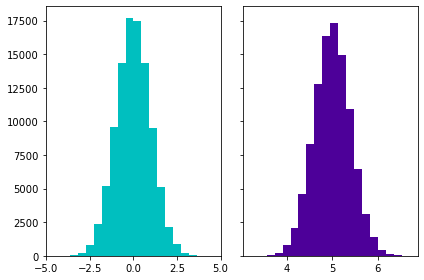

In [90]:
# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

# Create random sample of two normal distributions
dist1 = rng.standard_normal(100000)
dist2 = 0.4 * rng.standard_normal(100000) + 5

# Create a figure with two subplots in a row that share a same y-axis
fig, ax = plt.subplots(1, 2, sharey = True, tight_layout = True)

# Plot histograms (set the number of bins with the *bins* keyword argument)
ax[0].hist(dist1, bins = 20, color = 'c')
ax[1].hist(dist2, bins = 20, color = nyu);


4) Histogram plot in three dimensions: 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html
<br> (*Plot distribution against a 2D coordinate basis*)

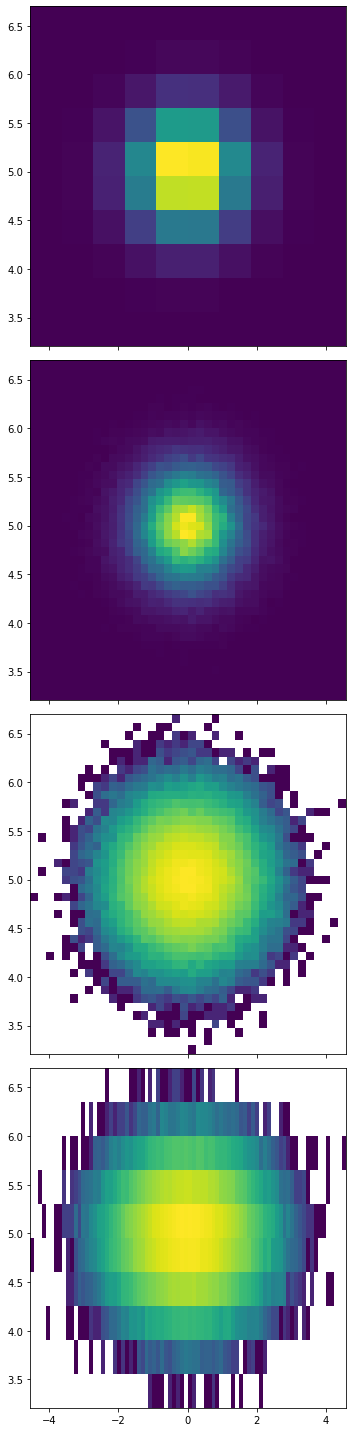

In [91]:
from matplotlib import colors

# Create a figure with four subplots
f, ax = plt.subplots(4, 1, figsize = (5, 20), sharex = True, sharey = True, tight_layout = True)

# Combine distributions onto a 2D coordinate grid and vizualize the resulting 3D histogram
ax[0].hist2d(dist1, dist2)

# Increase the number of bins on each axis
ax[1].hist2d(dist1, dist2, bins = 40)

# Define normalization of the colors
ax[2].hist2d(dist1, dist2, bins = 40, norm = colors.LogNorm())

# Define custom numbers of bins for each axis
ax[3].hist2d(dist1, dist2, bins = (80, 10), norm = colors.LogNorm());


### Error Bar plots, Box plots and Violin plots

5) Error bar plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

*Let's look at both vertical or horizontal error bar plots*:

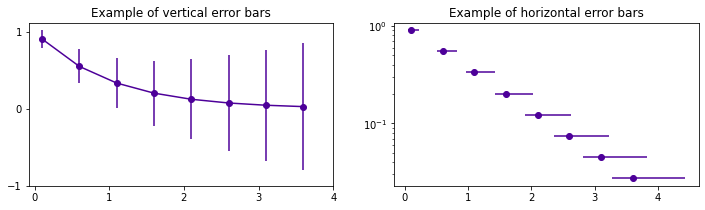

In [92]:
# Create example dataset
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# Create example of error bar values that vary with x-position
error = 0.1 + 0.2 * x

# Create a figure with two subplots
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 3))

# Vertical error bar plot
ax[0].errorbar(x, y, yerr = error, fmt = '-o', color = nyu)
ax[0].set_xticks(np.arange(0,5,1))
ax[0].set_yticks(np.arange(-1,2,1))
ax[0].set_title('Example of vertical error bars')

# Horizontal error bar plot with different lower vs. upper error values
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]
ax[1].errorbar(x, y, xerr = asymmetric_error, fmt = 'o', color = nyu)
ax[1].set_yscale('log')
ax[1].set_title('Example of horizontal error bars');


6) Box plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
<br> 7) Violin plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html

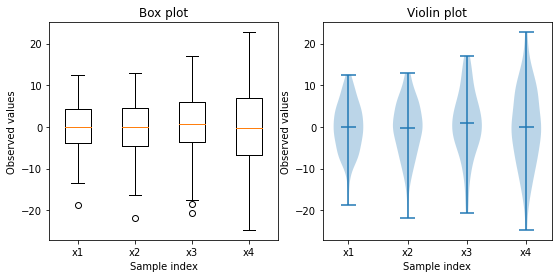

In [93]:
# Create random sample of four normal distributions
np.random.seed(19680801)
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# Create a figure with two subplots
f, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

# Box plot
axs[0].boxplot(all_data)
axs[0].set_title('Box plot')

# Violin plot
axs[1].violinplot(all_data, showmeans = True) # showmedians = True) 
axs[1].set_title('Violin plot');

# Set ticks and labels
for ax in axs: 
    ax.set_xticks([x + 1 for x in range(len(all_data))],labels = ['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Observed values')


**Box plot**: The box extends from first quartile (Q1) to third quartile (Q3), called the inter-quartile range (IQR), with a line at the median. Whiskers extend from the box by 1.5x the IQR. Flier points are data points past the end of the whiskers ('outliers').

**Violin plot**: Each filled area extends to represent the entire data range, with lines at the mean or median, minimum and maximum.